In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import numpy as np
import pandas as pd

#pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
import string


In [2]:
test= pd.read_csv('Twitter Sentiment Test.csv')
train = pd.read_csv('Twitter Sentiment Train.csv')

In [3]:
print('Training dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Testing dataset has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Training dataset has 31962 rows and 3 columns
Testing dataset has 17197 rows and 2 columns


In [4]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [6]:
train.label.unique()

array([0, 1], dtype=int64)

In [7]:
train[train.label == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [8]:
train[train.label == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [9]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
train_length = train.tweet.str.len()
test_length = test.tweet.str.len()
print(train_length,test_length)

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64 0         90
1        101
2         71
3        142
4         93
        ... 
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64


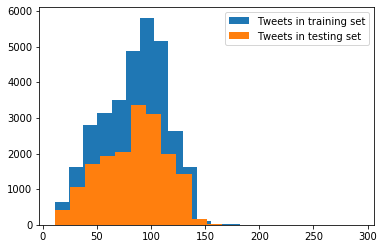

In [11]:
plt.hist(train_length, bins=20, label='Tweets in training set')
plt.hist(test_length, bins=20, label='Tweets in testing set')
plt.legend()
plt.show()

In [12]:
combined = train.append(test, ignore_index=True)
print('Combined data has {} rows and {} columns'.format(combined.shape[0], combined.shape[1]))

Combined data has 49159 rows and 3 columns


In [13]:
combined.head(10) #last values too

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [14]:
combined.tail(10)

,id,label,tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [15]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def clean_tweet(tweet):
  
  '''This function takes raw tweet as input and
  returns cleaned tweet. It removes twitter handles, punctuation, 
  short words and stopwords which does not contribute much to our
  analysis'''
  clean_handle = re.sub(r'@[\w]*', '', tweet)                                   # Removes twitter handles from tweets
  clean_punc = re.sub(r'[^a-zA-Z#]', ' ', clean_handle)                          # Removes punctuation, special characters(except #tags) 
  clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3] # Remove short words and tokenize
  clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]       # Stem tokenized words
  return ' '.join(clean_normalize)

In [16]:
clean_tweet(combined.tweet.iloc[3])

'#model love take with time'

In [17]:
combined.tweet = combined.tweet.apply(lambda x : clean_tweet(x))

In [18]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, stopwords=STOPWORDS)

In [19]:
all_tweets = ' '.join(combined.tweet)
good_tweets = ' '.join(combined[combined.label == 0].tweet)
bad_tweets = ' '.join(combined[combined.label == 1].tweet)



# Data Visualisation

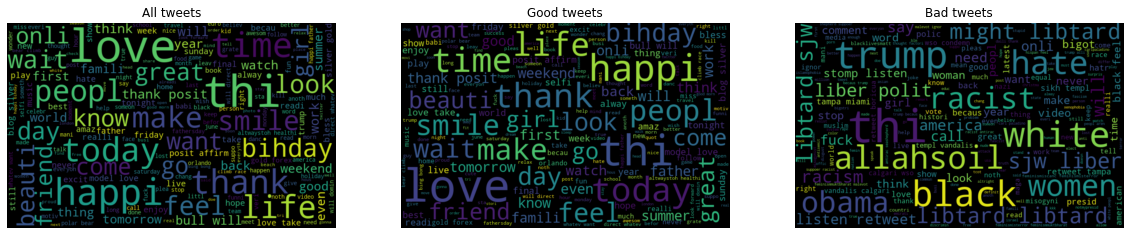

In [20]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(wordcloud.generate(all_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('All tweets')
plt.subplot(1,3,2)
plt.imshow(wordcloud.generate(good_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('Good tweets')
plt.subplot(1,3,3)
plt.imshow(wordcloud.generate(bad_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('Bad tweets')
plt.show()

Hashtag Count

def extract_hashtags(tweet):
  hashtag = re.findall(r'#(\w+)', tweet)
  return hashtag

In [22]:
good_hashtags = extract_hashtags(good_tweets)
bad_hashtags = extract_hashtags(bad_tweets)


In [23]:
from nltk import FreqDist
good = FreqDist(good_hashtags)
bad = FreqDist(bad_hashtags)

good_ht = pd.DataFrame({'Hashtag' : list(good.keys()) , 'Count' : list(good.values())}).sort_values('Count', ascending=False)
bad_ht = pd.DataFrame({'Hashtag' : list(bad.keys()) , 'Count' : list(bad.values())}).sort_values('Count', ascending=False)

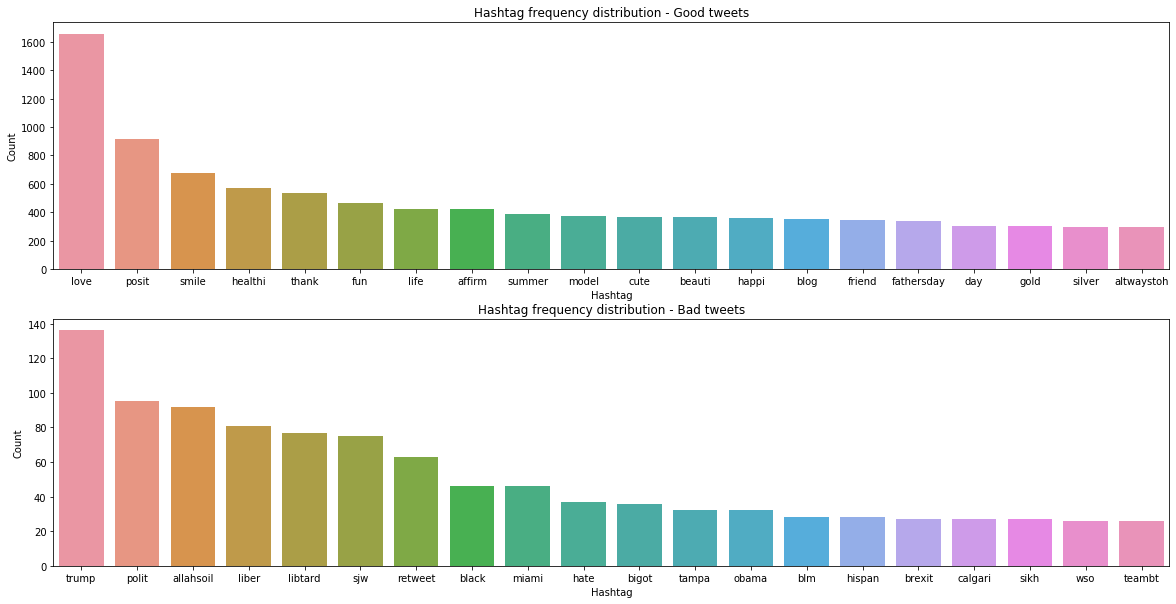

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(data=good_ht.iloc[:20], x='Hashtag', y='Count')
plt.title('Hashtag frequency distribution - Good tweets')
plt.subplot(2,1,2)
sns.barplot(data=bad_ht.iloc[:20], x='Hashtag', y='Count')
plt.title('Hashtag frequency distribution - Bad tweets')
plt.show()

In [25]:
!pip install genism

  ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

ModuleNotFoundError: No module named 'gensim'

In [29]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined.tweet)
bow.shape

(49159, 1000)

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined.tweet)
tfidf.shape

(49159, 1000)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_curve, auc
train_bow = bow[:31962, :] # Training data had 31962 rows
test_bow_without_label = bow[31962:, :] # unlabbeled tweet data
x_bow_train, x_bow_test, y_bow_train, y_bow_test = train_test_split(train_bow, train.label, test_size=0.3, random_state=42)

In [56]:
model = LogisticRegression()
model.fit(x_bow_train, y_bow_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
bow_pred = model.predict(x_bow_test)
print('Accuracy score : ',accuracy_score(y_bow_test, bow_pred))
print('F1 Score : ',f1_score(y_bow_test, bow_pred))

Accuracy score :  0.9458754823234957
F1 Score :  0.48460774577954313


In [58]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_bow_test,bow_pred)
cf_matrix

array([[8826,   79],
       [ 440,  244]], dtype=int64)

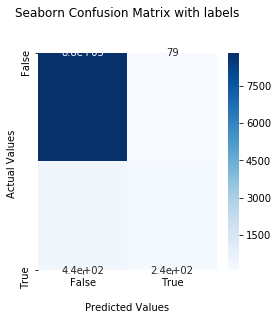

In [59]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [4,4]
## Display the visualization of the Confusion Matrix.
plt.show()

RoC Curve

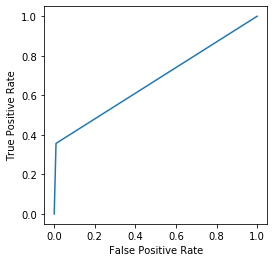

In [62]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_bow_test,  bow_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PRECISION VS RECALL

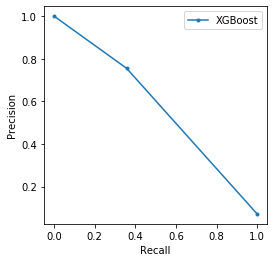

In [61]:
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_bow_test,  bow_pred)
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Support Vector Machines

In [63]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, probability=True)
model.fit(x_bow_train, y_bow_train)
bow_pred = model.predict(x_bow_test)
print('Accuracy score : ',accuracy_score(y_bow_test, bow_pred))
print('F1 Score : ',f1_score(y_bow_test, bow_pred))

Accuracy score :  0.9456669100010429
F1 Score :  0.4805583250249251


In [64]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_bow_test,bow_pred)
cf_matrix

array([[8827,   78],
       [ 443,  241]], dtype=int64)

Confusion Matrix

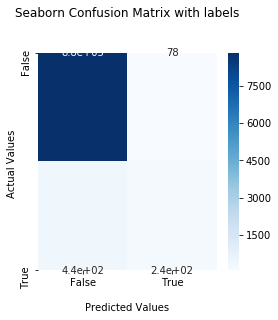

In [66]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [4,4]
## Display the visualization of the Confusion Matrix.
plt.show()

ROC CURVE

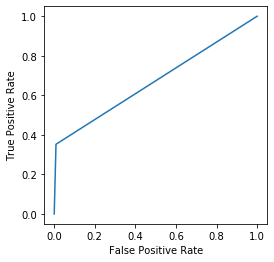

In [68]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_bow_test,  bow_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PRECISON VS RECALL

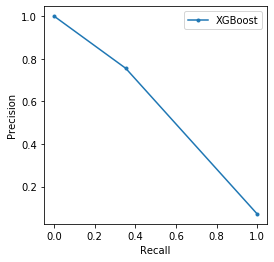

In [70]:
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_bow_test,  bow_pred)
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400, random_state=11)

In [72]:
rfc.fit(x_bow_train, y_bow_train)
bow_pred = rfc.predict(x_bow_test)
print('Accuracy score : ',accuracy_score(y_bow_test, bow_pred))
print('F1 Score : ',f1_score(y_bow_test, bow_pred))

Accuracy score :  0.9406611742621754
F1 Score :  0.5494853523357086


CONFUSION MATRIX

Confusion_Matrix
[[8673  232]
 [ 337  347]]


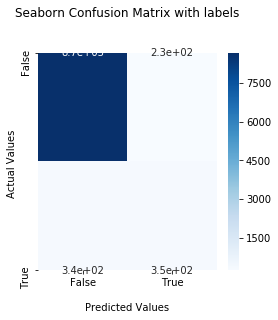

In [74]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_bow_test,bow_pred)
print("Confusion_Matrix")
print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [4,4]
## Display the visualization of the Confusion Matrix.
plt.show()

ROC CURVE

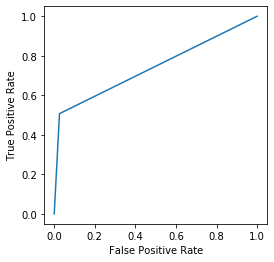

In [76]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_bow_test,  bow_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PRECISON VS RECALL

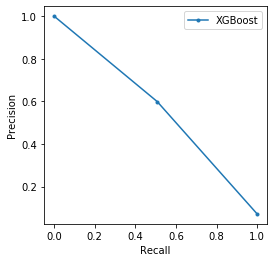

In [78]:
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_bow_test,  bow_pred)
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(x_bow_train, y_bow_train)
bow_pred = xgb.predict(x_bow_test)
print('Accuracy score : ',accuracy_score(y_bow_test, bow_pred))
print('F1 Score : ',f1_score(y_bow_test, bow_pred))

Accuracy score :  0.9461883408071748
F1 Score :  0.5248618784530387


Confusion Matrix

Confusion_Matrix
[[8788  117]
 [ 399  285]]


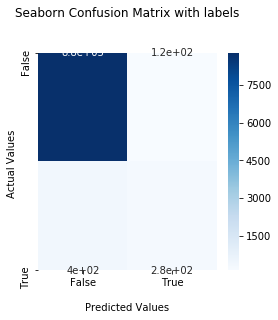

In [80]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_bow_test,bow_pred)
print("Confusion_Matrix")
print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [4,4]
## Display the visualization of the Confusion Matrix.
plt.show()

ROC CURVE

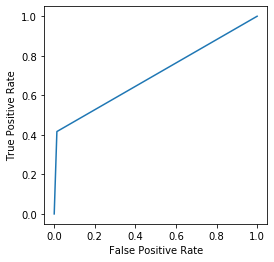

In [85]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_bow_test,  bow_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

PRECISON VS RECALL

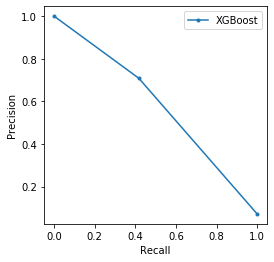

In [87]:
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_bow_test,  bow_pred)
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()